In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cols = [' fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'] = (df['class'] == 'g' ).astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


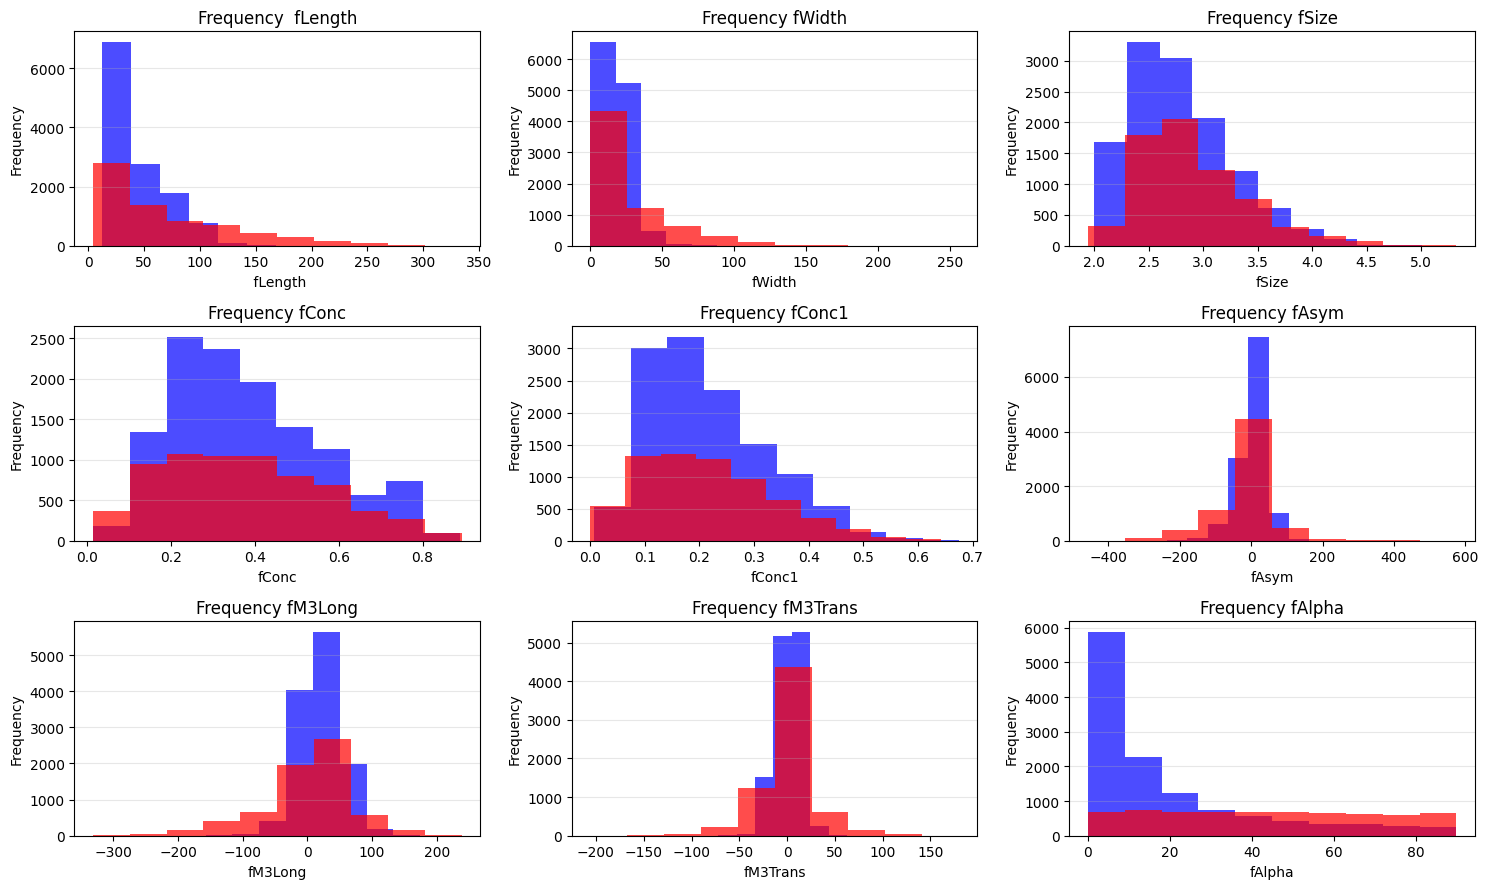

In [ ]:
fig, axes= plt.subplots(3,3, figsize = (15,9))
axes = axes.flatten()

for i, (ax, col) in enumerate(zip(axes, df.columns[:-1])):
  ax.hist(df[df['class'] == 1][col], color = 'blue', alpha = 0.7, label= 'gamma')
  ax.hist(df[df['class'] == 0][col], color = 'red', alpha = 0.7, label= 'hadron')
  ax.set_title(f'Frequency {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
  ax.grid(axis = 'y', alpha= 0.3)
plt.tight_layout()
plt.show()

In [ ]:
df.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,-0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,-0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,-0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,0.024615
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,0.004797
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,0.173587
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,0.193409
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,-0.003837
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,-0.460979
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,-0.065203


In [ ]:
import seaborn as sns

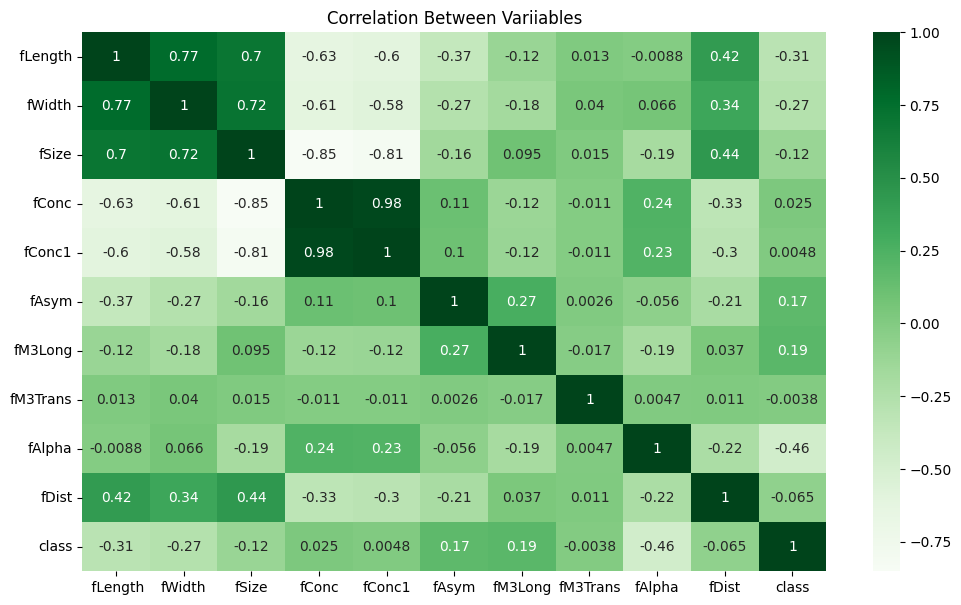

In [ ]:
plt.figure(figsize= (12, 7))
sns.heatmap(df.corr(), annot=True, cmap= 'Greens')
plt.title('Correlation Between Variiables')
plt.show()

In [ ]:
#preparing the dataset
train, valid, test = np.split(df.sample(frac= 1), [int(0.6* len(df)), int(0.8 * len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print(len(train))
print(len(valid))
print(len(test))


11412
3804
3804


In [ ]:
print(len(train[train['class']== 1]))
print(len(train[train['class']== 0]))

7454
3958


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [ ]:
def scale_dataset(dataframe, oversample= False):
  X= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))


  if oversample:
    ros= RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  return data, X, y

In [ ]:
train, X_train, y_train= scale_dataset(train, oversample= True)
valid, X_valid, y_valid= scale_dataset(valid, oversample= False)
test, X_test, y_test= scale_dataset(test, oversample= False)

In [ ]:
len(train)

11412

In [ ]:
X_train

array([[-0.38589091, -0.23207573, -0.04233645, ..., -0.58741152,
         1.75447893,  0.26685407],
       [ 0.16863175,  0.22734397,  1.37845673, ..., -0.85381813,
        -0.63396126, -0.04674937],
       [ 2.47230069,  0.59407947,  1.37125963, ..., -0.86929272,
         0.2581708 ,  0.49750474],
       ...,
       [ 2.21407509,  1.12398098,  1.25589427, ...,  1.72701658,
         1.44675991,  1.16396444],
       [ 0.73901772,  2.02283603,  0.7637393 , ...,  1.83876504,
         0.46224206,  1.35030251],
       [ 1.08372599,  2.96525375,  2.10515265, ...,  0.64344451,
        -0.74632836,  2.37293702]])

In [ ]:
sum(y_train == 1)


np.int64(7454)

In [ ]:
sum(y_train == 0)

np.int64(7454)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

KNN


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors= 5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1373
           1       0.84      0.87      0.86      2431

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
y_score = KNN_model.predict_proba(X_test)

In [ ]:
print(f"{roc_auc_score(y_test, y_score[:,1]):.2f}")

0.86


In [ ]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([0, 0, 1, ..., 1, 1, 1])

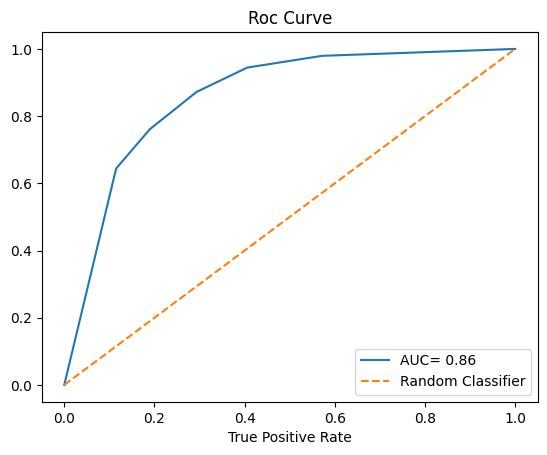

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
plt.plot(fpr, tpr, label= f'AUC= {roc_auc_score(y_test, y_score[:,1]):.2f}')
plt.plot([0,1], [0,1], linestyle= '--', label= 'Random Classifier')
plt.title('Roc Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend()
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1373
           1       0.73      0.90      0.81      2431

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



Logistic Regression Model

In [ ]:
from sklearn.linear_model import  LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1373
           1       0.84      0.83      0.83      2431

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1373
           1       0.87      0.90      0.89      2431

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.85      0.86      0.85      3804



Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(8, 4))
  plt.plot(history.history['loss'], label= 'Loss')
  plt.plot(history.history['val_loss'], label= 'val_loss')
  plt.title('History Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossenthropy')
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.show()

def plot_accuracy(history):
  plt.figure(figsize=(8,4))
  plt.plot(history.history['accuracy'], label= 'acc')
  plt.plot(history.history['val_accuracy'], label= 'val_acc')
  plt.title('History Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossenthropy')
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.show()


In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
  ax1.plot(history.history['loss'], label= 'loss')
  ax1.plot(history.history['val_loss'], label= 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossethropy')
  ax1.grid()
  ax1.legend()
  plt.show()
  plt.tight_layout()

  ax2.plot(history.history['accuracy'], label= 'acc')
  ax2.plot(history.history['val_accuracy'], label= 'var_acc')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()
  plt.show()
  plt.tight_layout()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout, lr, epochs, batch_size):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape= (10, )),
      tf.keras.layers.Dropout(dropout),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dense(1, activation= 'sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy' , metrics= ['accuracy'])

  history = nn_model.fit(X_train, y_train, epochs= epochs, batch_size= batch_size, validation_split= 0.2, verbose= 0)

  return nn_model, history

nodes 16 dropout 0.02 lr 0.001 batch_size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3172
nodes 32 dropout 0.02 lr 0.001 batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.3052
nodes 64 dropout 0.02 lr 0.001 batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3932


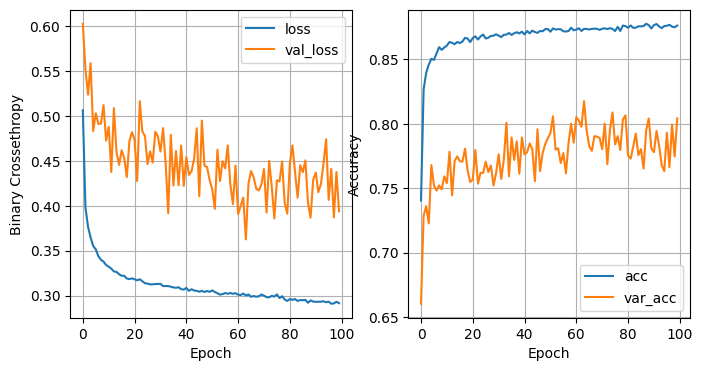

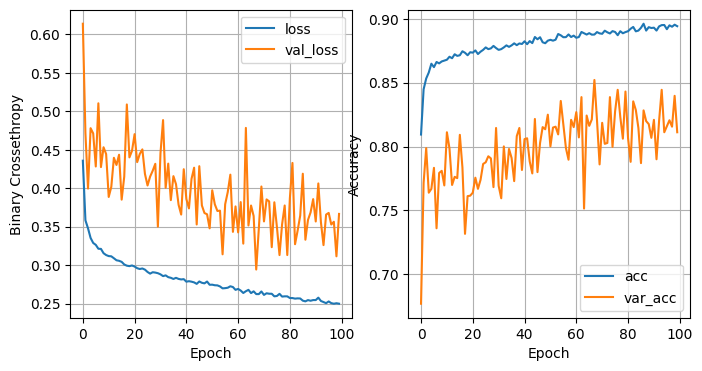

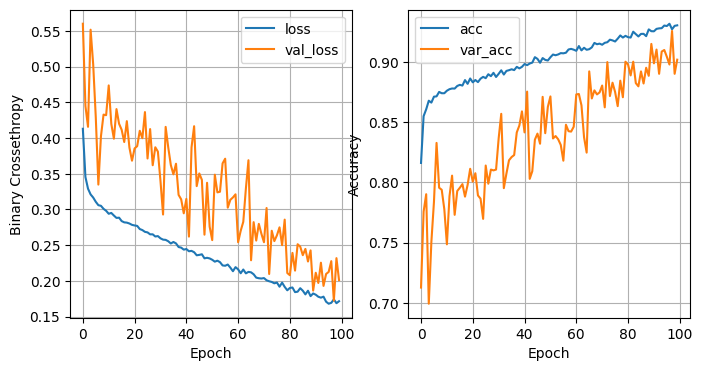

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs= 100
for num_nodes in [16, 32, 64]:
  for dropout in [ 0.02]:
    for lr in [ 0.001]:
      for batch_size in [32]:
        print(f"nodes {num_nodes} dropout {dropout} lr {lr} batch_size { batch_size}")
        model, history = train_model(X_train, y_train,num_nodes, dropout,lr, epochs, batch_size)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1373
           1       0.86      0.95      0.90      2431

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

